In [171]:
# Import dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [172]:
import numpy as np
import pandas as pd

In [173]:
import datetime as dt

In [174]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, exc, inspect

In [175]:
# Create an engine to communicate with the database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [176]:
# Reflect an existing database into a new model
Base = automap_base()
# Reflect the tables
Base.prepare(engine, reflect=True)

In [177]:
# View all of the classes found by automap
Base.classes.keys()

['measurement', 'station']

In [178]:
# Save references for the two tables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [179]:
# Print the column names and types in the "measurement" table
inspector = inspect(engine)
columns = inspector.get_columns("measurement")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [180]:
# Print the column names and types in the "station" table
inspector = inspect(engine)
columns = inspector.get_columns("station")
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [181]:
# Create a session (link) from Python to the database
session = Session(engine)

In [182]:
# Identify the last date in the database
last_day = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_day

('2017-08-23')

In [183]:
# Format it into date format
last_day = dt.date(2017, 8, 23)
last_day

datetime.date(2017, 8, 23)

In [184]:
# Identify the day 1 year ago from the last date in the database
first_day = last_day - dt.timedelta(days=365)
first_day

datetime.date(2016, 8, 23)

In [185]:
# Query that retrieves the last 12 months of precipitation data and save the results as a DataFrame
precipitation = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date).\
    filter(Measurement.date>first_day).all()
precipitation_df = pd.DataFrame(precipitation)
precipitation_df

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


<Figure size 2160x1296 with 0 Axes>

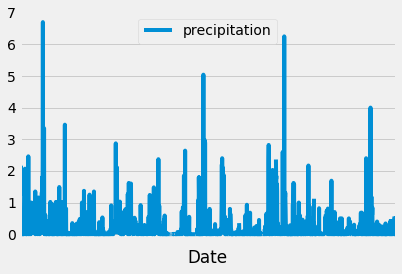

<Figure size 2160x1296 with 0 Axes>

In [186]:
# Plot the data, add a legend, get rid of the xticks, and label the x-axis
precipitation_df.plot()
plt.xlabel("Date")
plt.legend(["precipitation"])
plt.xticks([], [])
plt.figure(figsize=(30, 18))

In [187]:
# Calculate the summary statistics
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [188]:
# Query how many stations are available in the dataset
stations_count = session.query(Station.station).count()
print("There are a total of {} stations." .format(stations_count))

There are a total of 9 stations.


In [189]:
# Query to find the most active stations and list them in descending order
active_stations = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [190]:
# Identify the station with the highest number of observations
highest_tobs_station = active_stations[0][0]
highest_tobs_station

'USC00519281'

In [191]:
# Query to retrieve the last 12 months of temperature observations
results = session.query(Measurement.station, Measurement.tobs).order_by(Measurement.tobs.desc()).\
    filter(Measurement.date > first_day).\
    filter(Measurement.station == highest_tobs_station).all()
results

[('USC00519281', 83.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 82.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 81.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 80.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 79.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281', 78.0),
 ('USC00519281',

In [192]:
# Convert the reuslts variable into a DataFrame
tobs_df = pd.DataFrame(results)
tobs_df.head()

,station,tobs
0,USC00519281,83.0
1,USC00519281,82.0
2,USC00519281,82.0
3,USC00519281,82.0
4,USC00519281,81.0


Text(0.5, 1.0, 'Analysis for Station USC00519281 (2016-08-24 to 2017-08-23)')

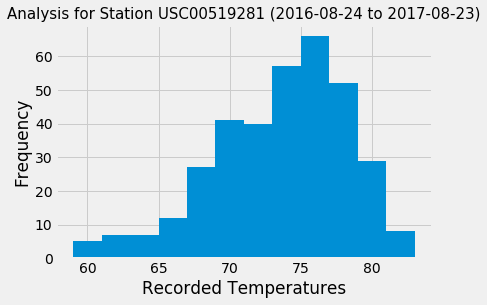

In [193]:
# Plot the temperature data as a histogram with 12 bins
plt.hist(tobs_df["tobs"], bins=12)
plt.ylabel("Frequency")
plt.xlabel("Recorded Temperatures")
plt.title(f"Analysis for Station {highest_tobs_station} ({first_day + dt.timedelta(1)} to {last_day})", fontsize=15)

In [194]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVG, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

In [195]:
# Calculate the tmin, tavg, and tmax for my trip using the previous year's data for those same dates
start_date = dt.date(2014, 6, 28) - dt.timedelta(365)
end_date = dt.date(2014, 7, 6) - dt.timedelta(365)
temps = calc_temps(start_date, end_date)
temps

[(66.0, 74.17460317460318, 80.0)]

([], <a list of 0 Text xticklabel objects>)

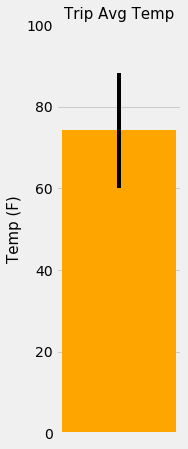

In [196]:
# Plot the results as a bar chart with a title, ylabel, and error bar (tmax - tmin)
plt.figure(figsize=(2, 7))
plt.bar(0, temps[0][1], color='orange', yerr=temps[0][2]-temps[0][0])
plt.title("Trip Avg Temp", fontsize=15)
plt.ylabel("Temp (F)", fontsize=15)
plt.ylim(0, 100)
plt.xticks(ticks=[])